In [1]:
import pandas as pd

# Load the pizza sales data
pizza_file_path = 'data/raw/pizzasales.csv'
pizza_data = pd.read_csv(pizza_file_path)

# Convert 'order_time' column to datetime format with mixed format handling
pizza_data['order_time'] = pd.to_datetime(pizza_data['order_time'], format='mixed', errors='coerce')

# Extract day of the week and hour from the order time
pizza_data['day_of_week'] = pizza_data['order_time'].dt.day_name()
pizza_data['hour'] = pizza_data['order_time'].dt.hour

# Group by day and hour to count orders
busiest_times = pizza_data.groupby(['day_of_week', 'hour']).size().reset_index(name='order_count')

# Find the busiest day and time
busiest_day_time = busiest_times.loc[busiest_times['order_count'].idxmax()]

# Print the results for non-technical teams
print("\nBusiest Days and Times for Orders:")
print("-----------------------------------")
print(f"The busiest day for orders is {busiest_day_time['day_of_week']} at {busiest_day_time['hour']}:00 with {busiest_day_time['order_count']} orders.")



Busiest Days and Times for Orders:
-----------------------------------
The busiest day for orders is Monday at 12:00 with 6543 orders.


Columns in the DataFrame: Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')


/var/folders/tl/fqm4n5tn49vg7yj320kzfb980000gn/T/ipykernel_9784/938345754.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pizza_data['order_date'] = pd.to_datetime(pizza_data['order_date'])


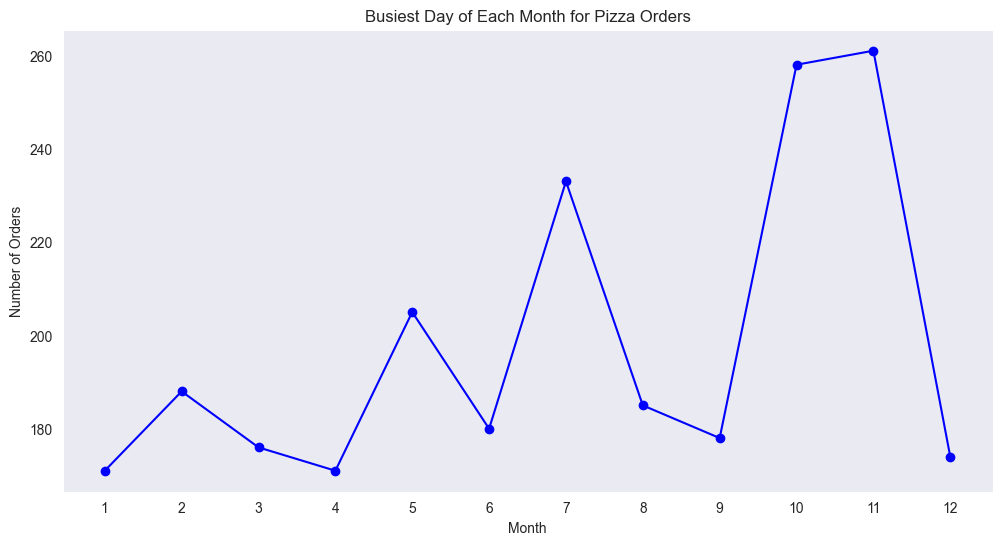

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the pizza sales data
pizza_file_path = ''
pizza_data = pd.read_csv(pizza_file_path)

# Print the columns to debug
print("Columns in the DataFrame:", pizza_data.columns)

# Check if 'order_date' column exists before converting
if 'order_date' in pizza_data.columns:
    pizza_data['order_date'] = pd.to_datetime(pizza_data['order_date'])
    # Extract month and day from the order_date
    pizza_data['month'] = pizza_data['order_date'].dt.month
    pizza_data['day'] = pizza_data['order_date'].dt.day
else:
    print("Error: 'order_date' column not found in the DataFrame.")

# Group by month and day, then count the number of orders
daily_orders = pizza_data.groupby(['month', 'day']).size().reset_index(name='orders')

# Find the busiest day of each month
busiest_days = daily_orders.loc[daily_orders.groupby('month')['orders'].idxmax()]

# Plot the busiest day of each month
plt.figure(figsize=(12, 6))
plt.plot(busiest_days['month'], busiest_days['orders'], marker='o', linestyle='-', color='blue')
plt.title('Busiest Day of Each Month for Pizza Orders')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(busiest_days['month'])
plt.grid()
plt.savefig('/Users/shaarifali/busiest_days_graph.png')
plt.show()


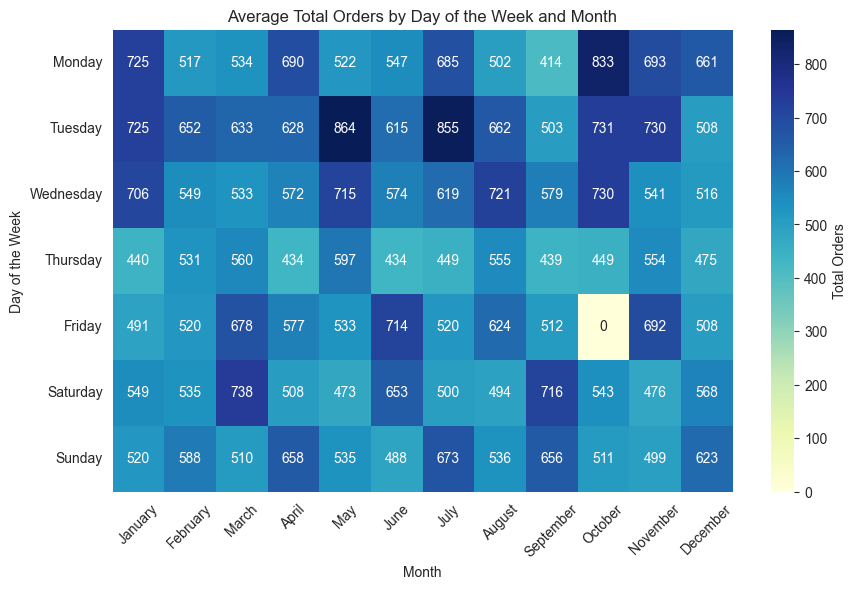

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the pizza sales data
pizza_file_path = 'data/raw/pizzasales.csv'
pizza_data = pd.read_csv(pizza_file_path)

# Convert 'order_date' column to datetime format and then to d/m format
pizza_data['order_date'] = pd.to_datetime(pizza_data['order_date'], format='%m/%d/%y').dt.strftime('%d/%m')

# Extract day of the week and month
pizza_data['day_of_week'] = pd.to_datetime(pizza_data['order_date'], format='%d/%m').dt.day_name().str.capitalize()  # Capitalize day names
pizza_data['month'] = pd.to_datetime(pizza_data['order_date'], format='%d/%m').dt.month_name().str.capitalize()  # Capitalize month names

# Define the order for days of the week and months
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Calculate the average total orders for each day of the week and month
heatmap_data = pizza_data.groupby(['day_of_week', 'month']).size().unstack(fill_value=0)

# Ensure that Friday of October has a value (set to 0 if missing)
if 'Friday' in days_order and 'October' in months_order:
    if 'Friday' not in heatmap_data.index or 'October' not in heatmap_data.columns:
        heatmap_data.loc['Friday', 'October'] = 0

# Reindex to sort days and months in ascending order
heatmap_data = heatmap_data.reindex(days_order).reindex(columns=months_order)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Total Orders'})
plt.title('Average Total Orders by Day of the Week and Month')
plt.xlabel('Month')
plt.ylabel('Day of the Week')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


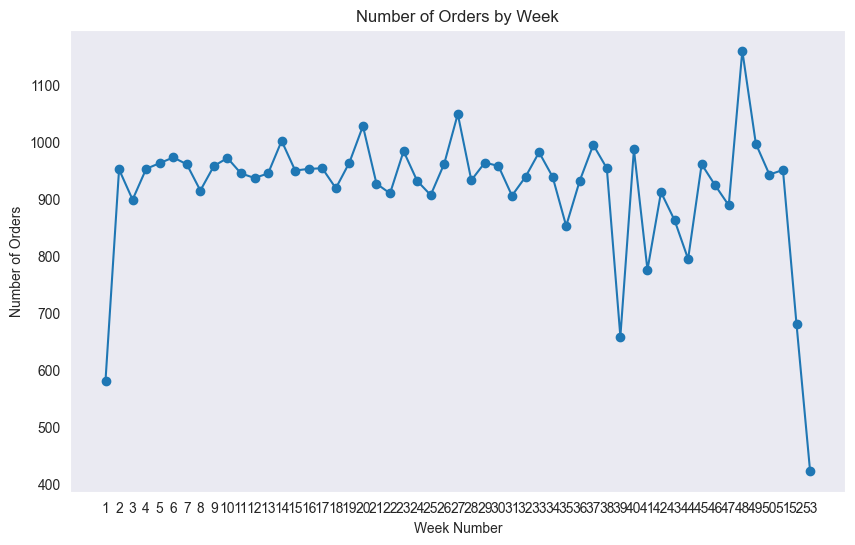

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the pizza sales data
pizza_file_path = 'data/raw/pizzasales.csv'
pizza_data = pd.read_csv(pizza_file_path)

# Convert 'order_date' column to datetime format
pizza_data['order_date'] = pd.to_datetime(pizza_data['order_date'], format='%m/%d/%y')

# Extract week number and count orders
pizza_data['week'] = pizza_data['order_date'].dt.isocalendar().week
orders_per_week = pizza_data.groupby('week').size()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(orders_per_week.index, orders_per_week.values, marker='o')
plt.title('Number of Orders by Week')
plt.xlabel('Week Number')
plt.ylabel('Number of Orders')
plt.xticks(orders_per_week.index)
plt.grid()
plt.show()


In [40]:
import pandas as pd

# Load the pizza sales data
pizza_file_path = 'data/raw/pizzasales.csv'
pizza_data = pd.read_csv(pizza_file_path)

pizza_data['order_time'] = pizza_data['order_time'].astype('string')
pizza_data[['Hour', 'Minute', 'Second']] = pizza_data['order_time'].str.split(":", expand=True)
pizza_data['Hour'] = pizza_data['Hour'].astype(int)  # Convert Hour to integer for sorting

# Count the number of orders per hour
hourly_counts = pizza_data['Hour'].value_counts().sort_index()

# Output the hours and their corresponding counts
print(hourly_counts)


Hour
9        4
10      17
11    2672
12    6543
13    6203
14    3521
15    3170
16    4185
17    5143
18    5359
19    4350
20    3487
21    2528
22    1370
23      68
Name: count, dtype: int64


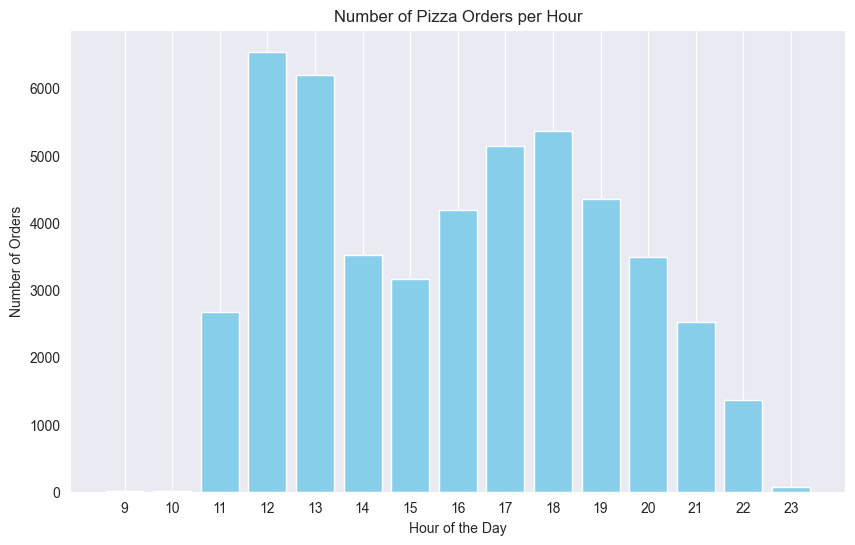

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the pizza sales data
pizza_file_path = 'data/raw/pizzasales.csv'
pizza_data = pd.read_csv(pizza_file_path)

pizza_data['order_time'] = pizza_data['order_time'].astype('string')
pizza_data[['Hour', 'Minute', 'Second']] = pizza_data['order_time'].str.split(":", expand=True)
pizza_data['Hour'] = pizza_data['Hour'].astype(int)  # Convert Hour to integer for sorting

# Count the number of orders per hour
hourly_counts = pizza_data['Hour'].value_counts().sort_index()

# Visualize the hours and their corresponding counts
plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts.values, color='skyblue')
plt.title('Number of Pizza Orders per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(hourly_counts.index)  # Set x-ticks to be the hours
plt.grid(axis='y')
plt.show()



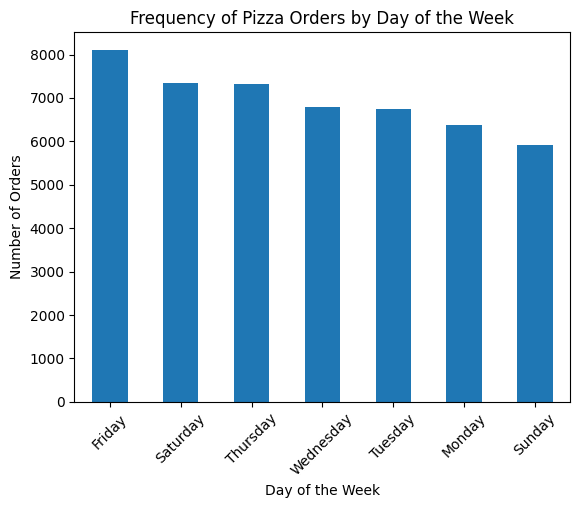

In [3]:
import pandas as pd

# Load the pizza sales data
pizza_file_path = 'data/raw/pizzasales.csv'
pizza_data = pd.read_csv(pizza_file_path)

# Convert the order_date column to datetime format
pizza_data['order_date'] = pd.to_datetime(pizza_data['order_date'], format='%m/%d/%y')

# Create a new column with the names of the days
pizza_data['day_of_week'] = pizza_data['order_date'].dt.day_name()

# Count the frequency of each day
day_counts = pizza_data['day_of_week'].value_counts()

# Visualize the results
import matplotlib.pyplot as plt

day_counts.plot(kind='bar')
plt.title('Frequency of Pizza Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()
